In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_soln = pd.read_csv("D:\Datasets\solution.csv")
df_soln.head()

Studid  Placement
0       1          1
1       2          1
2       3          1
3       4          1
4       5          1

In [4]:
df_train = pd.read_csv(r"D:\Datasets\train.csv")
df_train.head()

Name  10th %age  12th %age  College %age  Amcat  \
0        MOHITE AARTI RAMESH       92.0       82.0          9.50   87.0   
1  WALUNJKAR SIDDHI SHAHURAO        NaN        NaN           NaN    NaN   
2     KABADI KAIVALYA SUDHIR       92.0       86.0          9.00   51.0   
3        MULLA MOIN ADILSHAH       91.0       84.0          9.80   64.0   
4    BHAPKAR SHRUTI MOHANRAO       84.5        NaN          9.41    0.0   

   Placement  
0          1  
1          1  
2          1  
3          1  
4          1

In [6]:
df_test = pd.read_csv(r"D:\Datasets\test.csv")
df_test.head()

Studid                       Name  10th %age  12th %age  College %age  \
0       1     BHALERAO KAJAL SHANKAR       72.4        NaN          88.0   
1       2    BHATEWARA JINESH JAYANT        NaN        NaN           NaN   
2       3      KANSAGARA JEET ASHWIN        NaN        NaN           NaN   
3       4    DESHPANDE ISHAN SHIRISH        NaN        NaN           NaN   
4       5  BHANUSHALI HARSHIT DHIRAJ       90.0      82.46           9.4   

   Amcat  
0    7.0  
1    NaN  
2    NaN  
3    NaN  
4   94.0

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          253 non-null    object 
 1   10th %age     135 non-null    float64
 2   12th %age     113 non-null    float64
 3   College %age  135 non-null    float64
 4   Amcat         135 non-null    float64
 5   Placement     253 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.0+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Studid        73 non-null     int64  
 1   Name          73 non-null     object 
 2   10th %age     44 non-null     float64
 3   12th %age     39 non-null     float64
 4   College %age  44 non-null     float64
 5   Amcat         44 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.5+ KB


In [9]:
df_train.shape

(253, 6)

In [10]:
df_test.shape

(73, 6)

In [11]:
df_train.describe()

10th %age   12th %age  College %age       Amcat   Placement
count  135.000000  113.000000      135.0000  135.000000  253.000000
mean    89.727926   79.640619       13.7800   43.251852    0.770751
std      6.189111   10.600583       18.8244   32.960564    0.421183
min     68.000000    8.000000        7.8000   -2.000000    0.000000
25%     87.000000   75.000000        8.8250   12.000000    1.000000
50%     91.300000   82.000000        9.1100   39.000000    1.000000
75%     94.000000   86.000000        9.5000   73.500000    1.000000
max    100.000000   93.100000       89.6000  100.000000    1.000000

In [12]:
df_test.describe()

Studid  10th %age  12th %age  College %age      Amcat
count  73.000000  44.000000  39.000000     44.000000  44.000000
mean   37.000000  90.951136  79.101538     14.643409  44.931818
std    21.217131   5.043533  13.687290     20.306082  33.079466
min     1.000000  72.400000   8.000000      8.000000  -2.000000
25%    19.000000  89.975000  75.000000      8.975000   7.000000
50%    37.000000  92.200000  79.540000      9.400000  48.500000
75%    55.000000  94.075000  87.075000      9.612500  76.250000
max    73.000000  99.200000  93.080000     89.500000  98.000000

In [13]:
# Identify values greater than 10 in the 'college%age' column
mask0 = df_train['College %age'] > 10
mask1 = df_test['College %age'] > 10

# Divide the identified values by 10
df_train.loc[mask0, 'College %age'] /= 10
df_test.loc[mask1, 'College %age'] /= 10

In [14]:
df_train.describe()

10th %age   12th %age  College %age       Amcat   Placement
count  135.000000  113.000000    135.000000  135.000000  253.000000
mean    89.727926   79.640619      9.061733   43.251852    0.770751
std      6.189111   10.600583      0.482183   32.960564    0.421183
min     68.000000    8.000000      7.800000   -2.000000    0.000000
25%     87.000000   75.000000      8.800000   12.000000    1.000000
50%     91.300000   82.000000      9.000000   39.000000    1.000000
75%     94.000000   86.000000      9.470000   73.500000    1.000000
max    100.000000   93.100000     10.000000  100.000000    1.000000

In [15]:
df_test.describe()

Studid  10th %age  12th %age  College %age      Amcat
count  73.000000  44.000000  39.000000     44.000000  44.000000
mean   37.000000  90.951136  79.101538      9.192273  44.931818
std    21.217131   5.043533  13.687290      0.457002  33.079466
min     1.000000  72.400000   8.000000      8.000000  -2.000000
25%    19.000000  89.975000  75.000000      8.900000   7.000000
50%    37.000000  92.200000  79.540000      9.165000  48.500000
75%    55.000000  94.075000  87.075000      9.592500  76.250000
max    73.000000  99.200000  93.080000     10.000000  98.000000

In [16]:
columns_to_fill = ['10th %age', '12th %age', 'College %age', 'Amcat'] 

# df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mode().iloc[0])
# df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mode().iloc[0])

df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].median())
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].median())

# df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mean())
# df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mean())

In [17]:
df_train.head()

Name  10th %age  12th %age  College %age  Amcat  \
0        MOHITE AARTI RAMESH       92.0       82.0          9.50   87.0   
1  WALUNJKAR SIDDHI SHAHURAO       91.3       82.0          9.00   39.0   
2     KABADI KAIVALYA SUDHIR       92.0       86.0          9.00   51.0   
3        MULLA MOIN ADILSHAH       91.0       84.0          9.80   64.0   
4    BHAPKAR SHRUTI MOHANRAO       84.5       82.0          9.41    0.0   

   Placement  
0          1  
1          1  
2          1  
3          1  
4          1

In [18]:
df_test.head()

Studid                       Name  10th %age  12th %age  College %age  \
0       1     BHALERAO KAJAL SHANKAR       72.4      79.54         8.800   
1       2    BHATEWARA JINESH JAYANT       92.2      79.54         9.165   
2       3      KANSAGARA JEET ASHWIN       92.2      79.54         9.165   
3       4    DESHPANDE ISHAN SHIRISH       92.2      79.54         9.165   
4       5  BHANUSHALI HARSHIT DHIRAJ       90.0      82.46         9.400   

   Amcat  
0    7.0  
1   48.5  
2   48.5  
3   48.5  
4   94.0

[Text(0.5, 0, '10th %age'),
 Text(1.5, 0, '12th %age'),
 Text(2.5, 0, 'College %age'),
 Text(3.5, 0, 'Amcat'),
 Text(4.5, 0, 'Placement')]

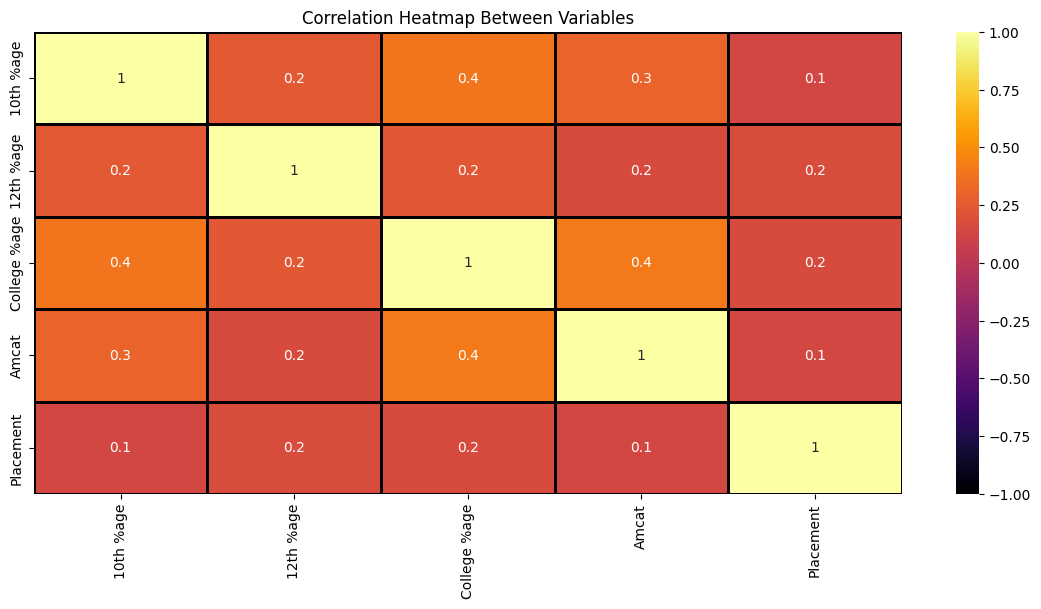

In [19]:
import seaborn as sns
corr_df = df_train.drop(['Name'], axis=1).corr(method="pearson")

plt.figure(figsize=(14,6))
# annot writes each value of dataset in cell
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [20]:
# X contains the features, y contains the target variable

X_train = df_train[['College %age', 'Amcat']]
y_train = df_train['Placement']

X_test = df_test[['College %age', 'Amcat']]
y_test = df_soln['Placement']

In [21]:
# Split the training data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(
    # X, y, test_size=0.2
# )

In [22]:
# X_test

Logistic Regression

In [23]:
# Initialize the Logistic Regression model

logistic_model = LogisticRegression()

In [24]:
# Train the model on the training set

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions on the testing set
# logistic_model.score(X_test, y_test)

y_pred1 = logistic_model.predict(X_test)
np.array(y_pred1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Evaluate the model

accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy of Logistic Regression: {accuracy1:.2f}')

Accuracy of Logistic Regression: 0.84


In [28]:
confusion_matrix(y_test, y_pred1)

array([[ 0, 12],
       [ 0, 61]], dtype=int64)

             Actual Positive   Actual Negative
Predicted Positive          60                21
Predicted Negative         0 1               0 1


Support Vector machine SVM

In [29]:
df_train0 = df_train[df_train.Placement == 0]
df_train1 = df_train[df_train.Placement == 1]
# df_train0.head()
# df_train1.head()

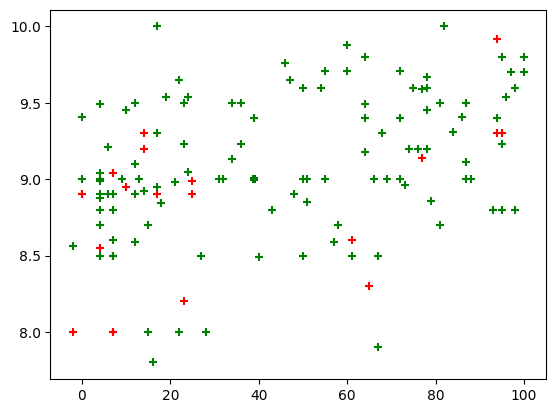

In [30]:
plt.scatter(df_train0['Amcat'], df_train0['College %age'], color='red', marker='+')
plt.scatter(df_train1['Amcat'], df_train1['College %age'], color='green', marker='+')

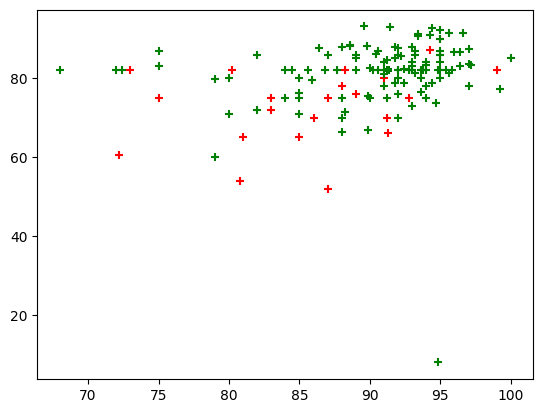

In [31]:
plt.scatter(df_train0['10th %age'], df_train0['12th %age'], color='red', marker='+')
plt.scatter(df_train1['10th %age'], df_train1['12th %age'], color='green', marker='+')

In [32]:
from sklearn.svm import SVC
svc_model = SVC()

In [33]:
svc_model.fit(X_train, y_train)

SVC()

In [34]:
svc_model.score(X_test, y_test)

0.8356164383561644

In [35]:
y_pred2 = svc_model.predict(X_test)
np.array(y_pred2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of SVM: {accuracy2:.2f}')

Accuracy of SVM: 0.84


In [38]:
confusion_matrix(y_test, y_pred2)

array([[ 0, 12],
       [ 0, 61]], dtype=int64)

Decission Tree

In [39]:
from sklearn import tree
decission_model = tree.DecisionTreeClassifier()

In [40]:
decission_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
decission_model.score(X_test,y_test)

0.8904109589041096

In [42]:
y_pred3 = decission_model.predict(X_test)
np.array(y_pred3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [43]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy of Decission tree: {accuracy3:.2f}')

Accuracy of Decission tree: 0.89


In [45]:
confusion_matrix(y_test, y_pred3)

array([[ 5,  7],
       [ 1, 60]], dtype=int64)

Random Forest Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [47]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
rf_model.score(X_test, y_test)

0.9041095890410958

In [49]:
y_pred4 = rf_model.predict(X_test)
np.array(y_pred4)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [50]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
accuracy4 = accuracy_score(y_test, y_pred4)
print(f'Accuracy of Random Forest: {accuracy4:.2f}')

Accuracy of Random Forest: 0.90


In [52]:
confusion_matrix(y_test, y_pred4)

array([[ 5,  7],
       [ 0, 61]], dtype=int64)

KNN algorithm

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
knn.score(X_test, y_test)

0.8493150684931506

In [56]:
y_pred5 = knn.predict(X_test)
np.array(y_pred5)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
accuracy5 = accuracy_score(y_test, y_pred5)
print(f'Accuracy of Random Forest: {accuracy5:.2f}')

Accuracy of Random Forest: 0.85


In [59]:
confusion_matrix(y_test, y_pred5)

array([[ 2, 10],
       [ 1, 60]], dtype=int64)

In [60]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()

In [61]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [62]:
NB_model.score(X_test, y_test)

0.8356164383561644

In [63]:
y_pred6 = NB_model.predict(X_test)
np.array(y_pred6)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
from xgboost import XGBClassifier

In [65]:
# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # for binary classification problems
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'  # use logloss for binary classification
}

# Create XGBClassifier
xg_model = XGBClassifier(**params, n_estimators=100)

# Train the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [66]:
# Make predictions
y_pred = xg_model.predict(X_test)
np.array(y_pred)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [67]:
xg_model.score(X_test, y_test)

0.863013698630137

In [ ]:
predictions = rf_model.predict(X_test)
# Create a DataFrame with 'Studid' and 'Predicted_Labels' columns
results_df = pd.DataFrame({'Studid': test_df['Studid'], 'Predicted_Labels': predictions})

# Save results to a CSV file
results_df.to_csv('reultspredict.csv',index=False)